<a href="https://colab.research.google.com/github/gulistanburtek/tez/blob/main/tez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble as ske                          # Tüm sınıflandırıcıları içeren kütüphane.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/tez/TrainingDataset.xlsx")
X = np.loadtxt("/content/drive/MyDrive/tez/Inputs.txt")
y = np.loadtxt("/content/drive/MyDrive/tez/Target.txt") 

In [ ]:
label_encoder = LabelEncoder()
mxscaler = MinMaxScaler()
data.head(10)

,Fire,eucdistRoads,EucDistWater,HillSha2,Slope2,Aspect,elevation,Landuse
0,0,0.050095,0.124456,148,11.070420,101.309900,2036,333
1,0,0.004191,0.074463,184,2.210947,6.340192,1889,2111
2,0,0.045259,0.081780,178,2.183844,206.565000,2036,333
3,0,0.022879,0.086218,154,9.314680,98.972630,2051,333
4,1,0.017334,0.082687,161,10.842260,196.821400,1917,243
5,0,0.035230,0.086185,208,17.301650,2.353297,2105,333
6,0,0.044480,0.073671,182,0.977023,270.000000,2051,333
7,0,0.017496,0.031250,211,15.180380,351.869900,1848,333
8,0,0.023572,0.019007,181,12.686830,37.303950,1895,333
9,0,0.032093,0.080652,175,15.515600,227.489500,2121,333


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fire          9196 non-null   int64  
 1   eucdistRoads  9196 non-null   float64
 2   EucDistWater  9196 non-null   float64
 3   HillSha2      9196 non-null   object 
 4   Slope2        9196 non-null   float64
 5   Aspect        9196 non-null   float64
 6   elevation     9196 non-null   int64  
 7   Landuse       9196 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 574.9+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fire,9196.0,0.500000,0.500027,0.0,0.000000,0.500000,1.000000,1.000000
eucdistRoads,9196.0,0.013036,0.015973,0.0,0.002681,0.007769,0.016987,0.133886
EucDistWater,9196.0,0.018051,0.020025,0.0,0.005104,0.011673,0.023647,0.154406
Slope2,9196.0,10.603040,9.975929,0.0,3.181740,6.628826,15.476342,59.959080
Aspect,9196.0,178.677909,103.231677,-1.0,94.672405,180.000000,261.905100,359.488400
elevation,9196.0,1032.868095,510.962683,129.0,544.000000,1020.000000,1404.000000,2864.000000
Landuse,9196.0,1272.694759,952.766781,121.0,321.000000,2111.000000,2121.000000,3321.000000


verisetindeki yagın ve yangın olmayan alanlartın oranları 

In [ ]:
data.loc[:,'Fire'].value_counts()

0    4598
1    4598
Name: Fire, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split    # Veriyi TRAIN/TEST olarak bölmek için.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **DATA VIRSULAIZATION**


(kırmızı=yangın var, yeşil yangın yok)

[Text(0.5, 1.0, 'Fire in Dataset')]

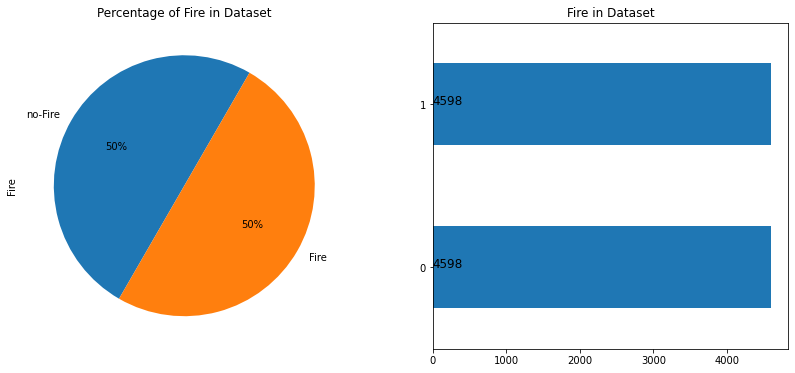

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,6))

ax1 = data['Fire'].value_counts().plot.pie(autopct = "%1.0f%%",labels = ['no-Fire','Fire'],startangle = 60,ax=ax1)
ax1.set(title='Percentage of Fire in Dataset') 

ax2 = data["Fire"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data["Fire"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title='Fire in Dataset')

In [ ]:
corr=data.corr()
corr

,Fire,eucdistRoads,EucDistWater,Slope2,Aspect,elevation,Landuse
Fire,1.000000,-0.305669,-0.244104,-0.504665,-0.000326,-0.561293,0.428535
eucdistRoads,-0.305669,1.000000,0.208421,0.390816,-0.024404,0.445359,-0.270661
EucDistWater,-0.244104,0.208421,1.000000,0.150993,0.011873,0.404890,-0.194299
Slope2,-0.504665,0.390816,0.150993,1.000000,-0.000855,0.503937,-0.468111
Aspect,-0.000326,-0.024404,0.011873,-0.000855,1.000000,-0.012899,0.015022
elevation,-0.561293,0.445359,0.404890,0.503937,-0.012899,1.000000,-0.374879
Landuse,0.428535,-0.270661,-0.194299,-0.468111,0.015022,-0.374879,1.000000


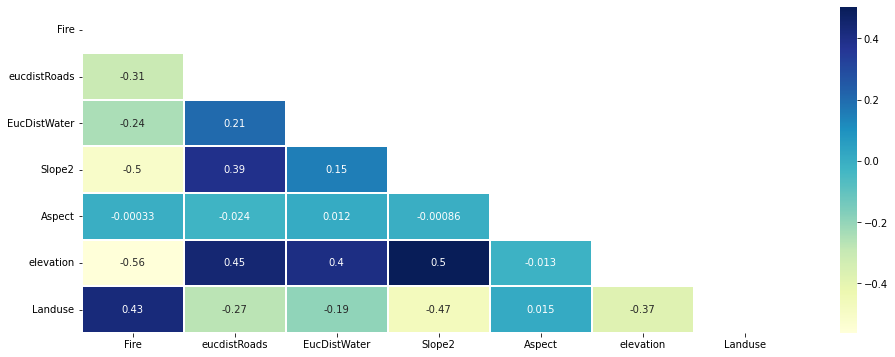

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True, linewidths=1,mask = mask, cmap="YlGnBu")

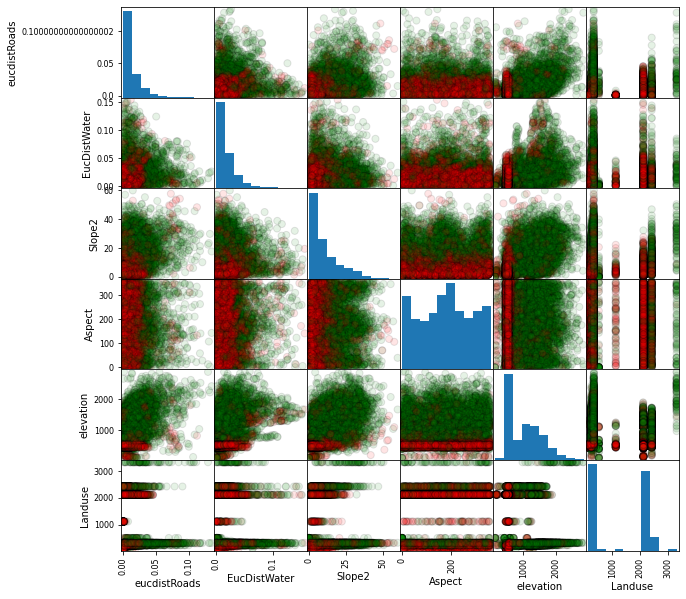

In [ ]:
color_list = ['red' if i==1 else 'green' for i in data.loc[:,'Fire']]
pd.plotting.scatter_matrix(data.loc[:,data.columns != 'Fire'],
                                       c=color_list,
                                       figsize= [10,10],
                                       diagonal='hist',
                                       alpha=0.1,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

In [ ]:
data.drop(['Landuse'],axis = 1,inplace = True)
data.head()

,Fire,eucdistRoads,EucDistWater,HillSha2,Slope2,Aspect,elevation
0,0,0.050095,0.124456,148,11.070420,101.309900,2036
1,0,0.004191,0.074463,184,2.210947,6.340192,1889
2,0,0.045259,0.081780,178,2.183844,206.565000,2036
3,0,0.022879,0.086218,154,9.314680,98.972630,2051
4,1,0.017334,0.082687,161,10.842260,196.821400,1917


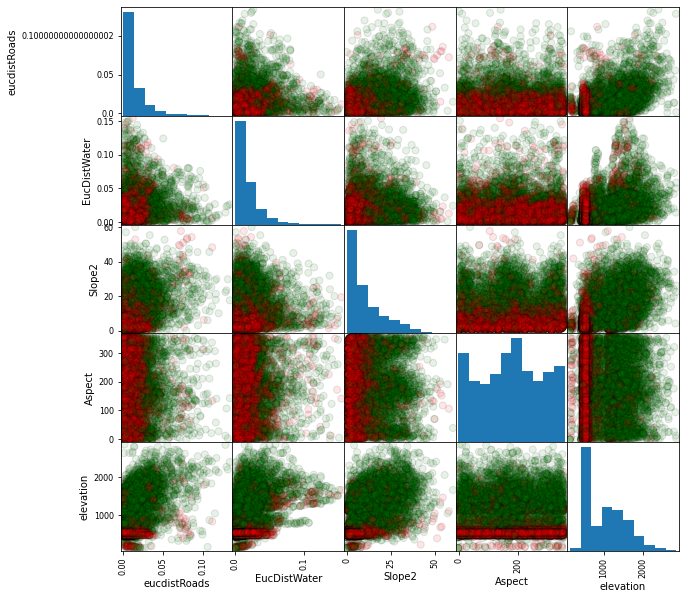

In [ ]:
color_list = ['red' if i==1 else 'green' for i in data.loc[:,'Fire']]
pd.plotting.scatter_matrix(data.loc[:,data.columns != 'Fire'],
                                       c=color_list,
                                       figsize= [10,10],
                                       diagonal='hist',
                                       alpha=0.1,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

# **LİNEAR SVC**

In [ ]:
method_names = []
method_scores = []

# **LİNEAR SVC**

In [ ]:
from sklearn.svm import LinearSVC

SVC = LinearSVC(loss='hinge', dual=True)
SVC.fit(X_train, y_train)

method_names.append("LINEER_SVC")
method_scores.append(SVC.score(X_test,y_test))

# predict the results
y_predtrain = SVC.predict(X_train)
y_pred_SVC = SVC.predict(X_test)

# view accuracy
print("Lineer SVC Classification Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Lineer SVC Classification Testing Accuracy:",accuracy_score(y_test, y_pred_SVC)*100.0)

Lineer SVC Classification Training Accuracy: 82.33737939620292
Lineer SVC Classification Testing Accuracy: 81.84458968772694


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 15.0, 'Predicted label')

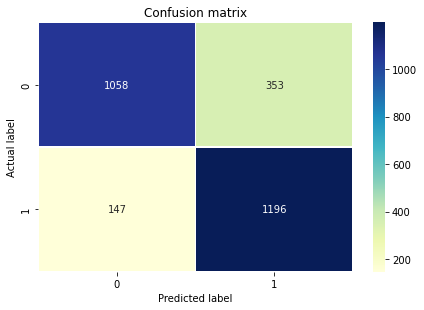

In [ ]:
y_pred_SVC = SVC.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_SVC)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **XGBOOST CLASSİFİER**

In [ ]:
import xgboost as xgb
from sklearn import metrics

XGB = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 200)  # XGBRegressor   XGBClassifier
XGB.fit(X_train,y_train)

method_names.append("XGBOOST")
method_scores.append(XGB.score(X_test,y_test))

# predict the results
y_predtrain = XGB.predict(X_train)
y_pred_XGB = XGB.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_XGB)*100.0)

Training Accuracy: 100.0
Testing Accuracy: 85.18518518518519


Text(0.5, 15.0, 'Predicted label')

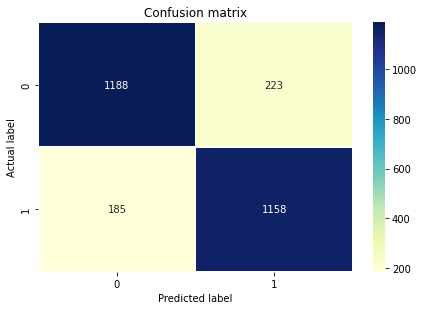

In [ ]:
y_pred_XGB = XGB.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_XGB)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **MLP CLASSİFİER**

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP =MLPClassifier(hidden_layer_sizes=(27), activation='relu', solver='adam', max_iter=10000,random_state=49)
MLP.fit(X_train, y_train)
accuracy = MLP.score(X_test, y_test)*100.0

method_names.append("MLP")
method_scores.append(MLP.score(X_test,y_test))

# predict the results
y_predtrain = MLP.predict(X_train)
y_pred_MLP = MLP.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_MLP)*100.0)

Training Accuracy: 85.35636476812948
Testing Accuracy: 83.76906318082789


Text(0.5, 15.0, 'Predicted label')

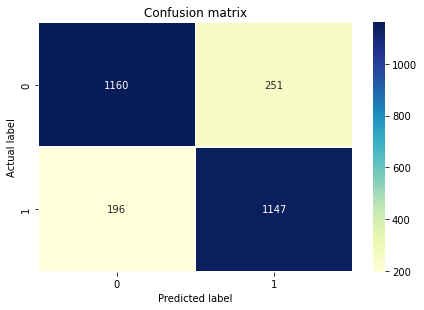

In [ ]:
y_pred_MLP = MLP.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_MLP)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
SVM = SVC(C=13,random_state = 10)
SVM.fit(X_train,y_train)

method_names.append("SVM")
method_scores.append(SVM.score(X_test,y_test))

# predict the results
y_predtrain = SVM.predict(X_train)
y_pred_SVM = SVM.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_pred_SVM))

Training Accuracy: 0.8646125116713352
Testing Accuracy: 0.8416848220769789


In [ ]:
train_accuracy = []
test_accuracy = []
for i in range(1,50):
  SVM = SVC(C=i,random_state=1)
  SVM.fit(X_train,y_train)
  #train accuracy
  train_accuracy.append(SVM.score(X_train, y_train))
  # test accuracy
  test_accuracy.append(SVM.score(X_test, y_test))

In [ ]:
print("Best accuracy is {} with C = {}".format(np.max(test_accuracy)*100.0,1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 84.16848220769789 with C = 13


Text(0.5, 15.0, 'Predicted label')

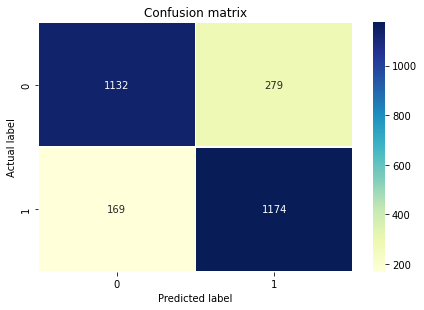

In [ ]:
y_pred_SVM = SVM.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_SVM)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = ske.RandomForestClassifier(n_estimators=300, random_state = 42)       
RFC.fit(X_train, y_train)                # Burada sınıflandırıcıyı eğitiyoruz. TRAIN SETI KULLANILMALI.
accuracy = RFC.score(X_test, y_test)*100.0     # Burada, accuracy skoru hesaplanıyor. TEST SETI KULLANILMALI.

# predict the results
y_predtrain = RFC.predict(X_train)
y_pred_RFC = RFC.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_pred_RFC))

Training Accuracy: 1.0
Testing Accuracy: 0.8565722585330429


Text(0.5, 15.0, 'Predicted label')

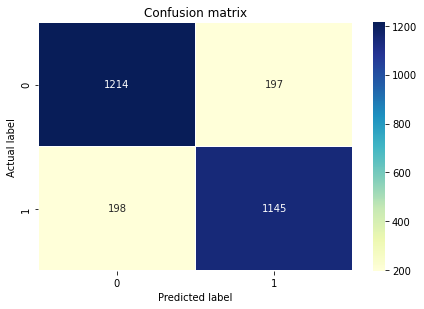

In [ ]:
y_pred_RFC = RFC.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_RFC)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
import pickle 
saved_model = pickle.dump(RFC, open('ForestModelOld.pickle','wb'))

In [ ]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [100, 110, 121, 131, 142, 152, 163, 173, 184, 194, 205, 215, 226, 236, 247, 257, 268, 278, 289, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
param_grid = {
                'sgdclassifier__learning_rate':['constant','optimal','invscaling'],
                'sgdclassifier__eta0':[0.0,0.01,0.1,0.3,0.5,0.7],
                'sgdclassifier__alpha':[0.0001,0.001,0.01,0.1]}

In [ ]:
RFC = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, 
                                n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
RFC.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   2.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   2.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   2.3s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   2.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   2.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   2.6s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=278; total time=   3.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=27

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 110, 121, 131,
                                                         142, 152, 163, 173,
                                                         184, 194, 205, 215,
                                                         226, 236, 247, 257,
                                                         268, 278, 289, 300]},
                   random_state=42, verbose=2)

In [ ]:
RFC.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
pred = RFC.predict(X_test)
print("Classification Report :\n ",classification_report(y_test,pred, zero_division=1))

Classification Report :
                precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1411
         1.0       0.85      0.85      0.85      1343

    accuracy                           0.86      2754
   macro avg       0.86      0.86      0.86      2754
weighted avg       0.86      0.86      0.86      2754



In [ ]:
random_model_accuracy1 = round(RFC.score(X_train, y_train)*100,2)
print(round(random_model_accuracy1, 2), '%')

97.31 %


In [ ]:
random_model_accuracy2 = round(RFC.score(X_test, y_test)*100,2)
print(round(random_model_accuracy2, 2), '%')

85.51 %


In [ ]:
method_names.append("RANDOM FOREST")
method_scores.append(RFC.score(X_test,y_test))

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 12)
KNN.fit(X_train,y_train)

method_names.append("KNN")
method_scores.append(KNN.score(X_test,y_test))

# predict the results
y_predtrain = KNN.predict(X_train)
y_pred_KNN = KNN.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_pred_KNN))

Training Accuracy: 0.8544973544973545
Testing Accuracy: 0.8347857661583151


In [ ]:
# Model complexity
neig = np.arange(1, 50)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 50(exclude)
    KNN = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    KNN.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(KNN.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(KNN.score(X_test, y_test))

In [ ]:
print("Best accuracy is {}   and    K = {}".format(np.max(test_accuracy)*100.0,1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 83.47857661583151   and    K = 12


Text(0.5, 15.0, 'Predicted label')

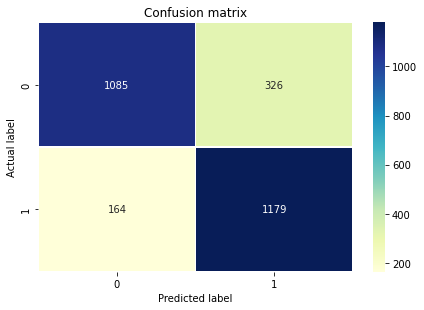

In [ ]:
y_pred_KNN = KNN.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_KNN)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **CATBOOST**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 77 kB/s 


# **CATBOOST**

In [ ]:
import catboost as cb
CAT = cb.CatBoostClassifier(max_depth=6)
CAT.fit(X_train, y_train)

method_names.append("CATBOOST")
method_scores.append(CAT.score(X_test,y_test))

# predict the results
y_predtrain = CAT.predict(X_train)
y_pred_CAT = CAT.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_pred_CAT))

Learning rate set to 0.022799
0:	learn: 0.6768090	total: 51.5ms	remaining: 51.4s
1:	learn: 0.6613827	total: 55.7ms	remaining: 27.8s
2:	learn: 0.6463042	total: 59.7ms	remaining: 19.8s
3:	learn: 0.6316835	total: 63.8ms	remaining: 15.9s
4:	learn: 0.6177576	total: 68ms	remaining: 13.5s
5:	learn: 0.6054333	total: 72.2ms	remaining: 12s
6:	learn: 0.5932719	total: 76.6ms	remaining: 10.9s
7:	learn: 0.5814688	total: 80.8ms	remaining: 10s
8:	learn: 0.5701572	total: 86.8ms	remaining: 9.55s
9:	learn: 0.5600865	total: 92.5ms	remaining: 9.15s
10:	learn: 0.5510069	total: 96.6ms	remaining: 8.68s
11:	learn: 0.5422496	total: 101ms	remaining: 8.3s
12:	learn: 0.5334426	total: 105ms	remaining: 7.96s
13:	learn: 0.5253424	total: 109ms	remaining: 7.69s
14:	learn: 0.5179016	total: 113ms	remaining: 7.45s
15:	learn: 0.5108914	total: 118ms	remaining: 7.24s
16:	learn: 0.5037917	total: 122ms	remaining: 7.05s
17:	learn: 0.4969200	total: 126ms	remaining: 6.87s
18:	learn: 0.4901234	total: 130ms	remaining: 6.72s
19:	lea

Text(0.5, 15.0, 'Predicted label')

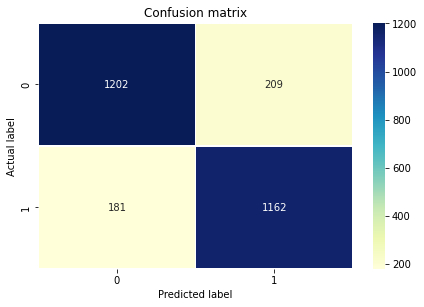

In [ ]:
y_pred_CAT = CAT.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_CAT)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion = "gini", random_state = 10)
dec_tree.fit(X_train,y_train)

method_names.append("DECISION TREE")
method_scores.append(dec_tree.score(X_test,y_test))

# predict the results
y_predtrain = dec_tree.predict(X_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_dec_tree)*100.0)

Training Accuracy: 100.0
Testing Accuracy: 79.99273783587509


Text(0.5, 15.0, 'Predicted label')

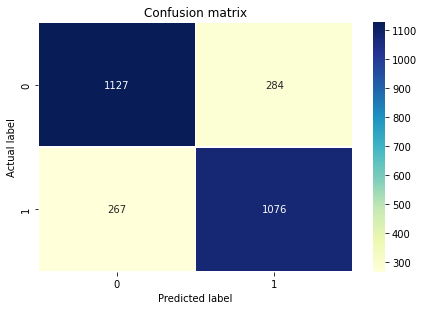

In [ ]:
y_pred_dec_tree = dec_tree.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_dec_tree)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear',class_weight='balanced')
log_reg.fit(X_train,y_train)

method_names.append("LOGISTIC REGRESSION")
method_scores.append(log_reg.score(X_test,y_test))

# predict the results
y_predtrain = log_reg.predict(X_train)
y_pred_log_reg = log_reg.predict(X_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain)*100.0)
print("Testing Accuracy:",accuracy_score(y_test, y_pred_log_reg)*100.0)

Training Accuracy: 82.24400871459694
Testing Accuracy: 81.8082788671024


Text(0.5, 15.0, 'Predicted label')

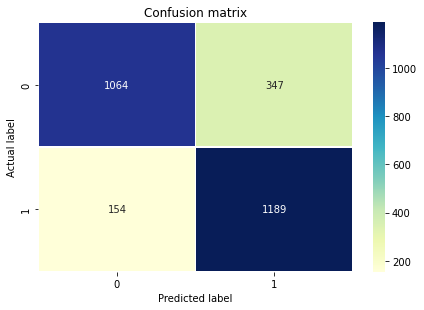

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred_log_reg)

sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **YAPAY SİNİR AĞI**

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
             loss = 'mean_squared_error',metrics = ['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 100,steps_per_epoch = 40,batch_size = 16,
                   validation_split = 0.3)

Epoch 1/100
40/40 [==============================] - 1s 11ms/step - loss: 0.2408 - acc: 0.5328 - val_loss: 0.2478 - val_acc: 0.4839
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2488 - acc: 0.4719 - val_loss: 0.2437 - val_acc: 0.4855
Epoch 3/100
40/40 [==============================] - 1s 13ms/step - loss: 0.2453 - acc: 0.4656 - val_loss: 0.2398 - val_acc: 0.4870
Epoch 4/100
40/40 [==============================] - 1s 13ms/step - loss: 0.2427 - acc: 0.5016 - val_loss: 0.2364 - val_acc: 0.4896
Epoch 5/100
40/40 [==============================] - 0s 12ms/step - loss: 0.2310 - acc: 0.5141 - val_loss: 0.2332 - val_acc: 0.4943
Epoch 6/100
40/40 [==============================] - 1s 13ms/step - loss: 0.2329 - acc: 0.4969 - val_loss: 0.2300 - val_acc: 0.4943
Epoch 7/100
40/40 [==============================] - 1s 22ms/step - loss: 0.2265 - acc: 0.5406 - val_loss: 0.2271 - val_acc: 0.5021
Epoch 8/100
40/40 [==============================] - 1s 23ms/step - loss: 0.2

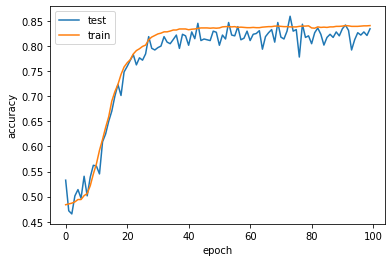

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['test','train'],loc = 'upper left')
plt.show()

In [ ]:
preds= (model.predict(X_test)>0.5).astype(int)
sum=0
for i in range(len(preds)):
    if(preds[i]==y_test[i]):
        sum=sum+1
print(sum/len(preds))

0.8151779230210603


# **FINAL TABLO**

Text(0, 0.5, 'Method Score')

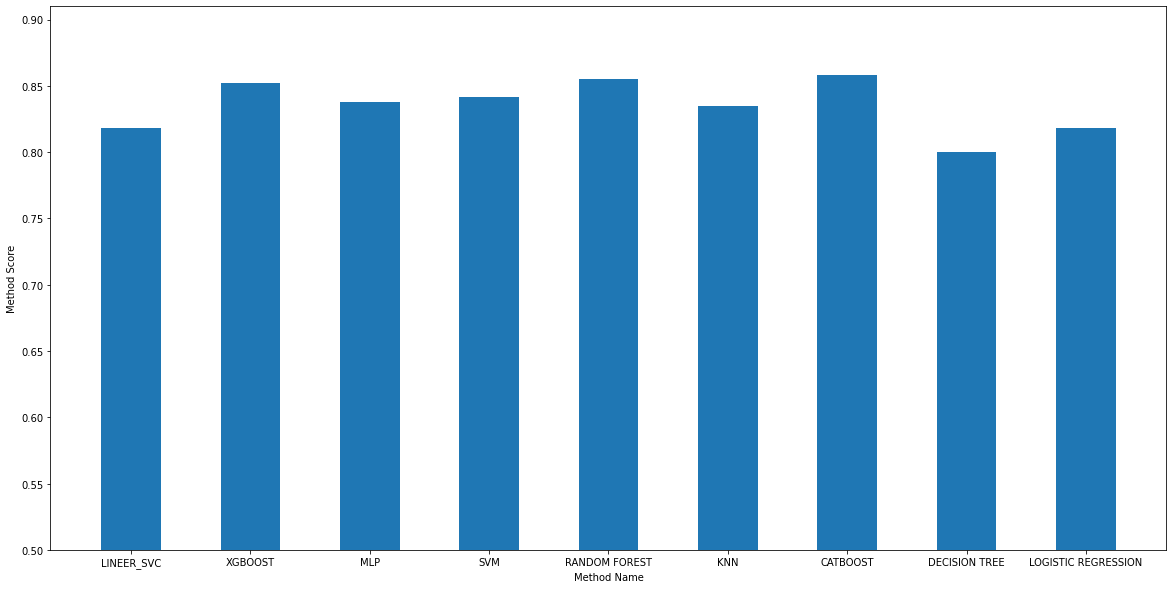

In [ ]:
plt.figure(figsize=(20,10))
plt.ylim([0.5,0.91])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')